In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.util import ngrams
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('Project 26 - CPL-5559-Mountain_Analytics-Dataset.csv')

In [3]:
#remove html tags
from bs4 import BeautifulSoup
for i in range(df.shape[0]):
    df['review'][i] = BeautifulSoup(df['review'][i], "lxml").text

In [4]:
#remove punctuations
import string
def punctuation(sentence):
    review = [letters.lower() for letters in sentence if letters not in string.punctuation ]
    review = ''.join(review)
    return review

df['review'] = df['review'].apply(punctuation)

In [5]:
#Encoding text variable
df['sentiment'].replace(['positive','negative'],[1,0],inplace=True)

In [6]:
#removing stopwords
#stopwords are common words that can be removed from the dataset. generally, these words don’t carry much significance thats why we have to remove it for better analysis
def stopwords(sentence):
    review = [words for words in sentence.split() if words not in nltk.corpus.stopwords.words('english')]
    review = ' '.join(review)
    return review

df['review'] = df['review'].apply(stopwords)

In [7]:
df['tokenized_sents'] = df['review'].apply(lambda x: nltk.word_tokenize(x))

In [8]:
from nltk import PorterStemmer 
ps = PorterStemmer() 
df['stemmed'] = df['tokenized_sents'].apply(lambda x :[ps.stem(y) for y in x] )

In [9]:
df.head()

,review,sentiment,tokenized_sents,stemmed
0,one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewingthats get touch darker side,1,"[one, reviewers, mentioned, watching, 1, oz, episode, youll, hooked, right, exactly, happened, methe, first, thing, struck, oz, brutality, unflinching, scenes, violence, set, right, word, go, trust, show, faint, hearted, timid, show, pulls, punches, regards, drugs, sex, violence, hardcore, classic, use, wordit, called, oz, nickname, given, oswald, maximum, security, state, penitentary, focuses, mainly, emerald, city, experimental, section, prison, cells, glass, fronts, face, inwards, privacy, high, agenda, em, city, home, manyaryans, muslims, gangstas, latinos, christians, italians, irish, moreso, scuffles, death, stares, dodgy, dealings, shady, agreements, never, far, awayi, would, say, main, appeal, show, due, fact, goes, shows, wouldnt, dare, forget, pretty, pictures, ...]","[one, review, mention, watch, 1, oz, episod, youll, hook, right, exactli, happen, meth, first, thing, struck, oz, brutal, unflinch, scene, violenc, set, right, word, go, trust, show, faint, heart, timid, show, pull, punch, regard, drug, sex, violenc, hardcor, classic, use, wordit, call, oz, nicknam, given, oswald, maximum, secur, state, penitentari, focus, mainli, emerald, citi, experiment, section, prison, cell, glass, front, face, inward, privaci, high, agenda, em, citi, home, manyaryan, muslim, gangsta, latino, christian, italian, irish, moreso, scuffl, death, stare, dodgi, deal, shadi, agreement, never, far, awayi, would, say, main, appeal, show, due, fact, goe, show, wouldnt, dare, forget, pretti, pictur, ...]"
1,wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done,1,"[wonderful, little, production, filming, technique, unassuming, oldtimebbc, fashion, gives, comforting, sometimes, discomforting, sense, realism, entire, piece, actors, extremely, well, chosen, michael, sheen, got, polari, voices, pat, truly, see, seamless, editing, guided, references, williams, diary, entries, well, worth, watching, terrificly, written, performed, piece, masterful, production, one, great, masters, comedy, life, realism, really, comes, home, little, things, fantasy, guard, rather, use, traditional, dream, techniques, remains, solid, disappears, plays, knowledge, senses, particularly, scenes, 

In [10]:
def unique_words(wordlist): 
    return list(set(wordlist))

In [11]:
df['stemmed'] = df['stemmed'].apply(lambda x: unique_words(x))

In [12]:
df['processed_review'] = df['tokenized_sents'].apply(lambda x: ' '.join(x))

In [13]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count
df['word count'] = df['review'].apply(no_of_words)

In [14]:
#make graph here for mean length for positive and negative review

Text(0.5, 1.0, 'Sentiment distribution')

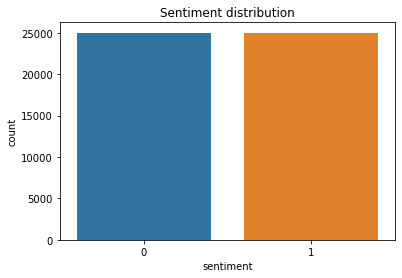

In [15]:
# bargraph to show bais in data

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [16]:
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return list(n_grams)

In [17]:
df['bi-grams'] = df['review'].apply(lambda text: extract_ngrams(text,2))

df['tri-grams'] = df['review'].apply(lambda text: extract_ngrams(text,3))

df['quad-grams'] = df['review'].apply(lambda text: extract_ngrams(text,4))

df['penta-grams'] = df['review'].apply(lambda text: extract_ngrams(text,5))

df.head()

review  \
0  one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewingthats get touch darker side   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown lovethis id laughed one woodys comedies years dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wears prada interesting superman great comedy go see friends   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [18]:
#saving the data incase of failure
df.to_csv('backupdatav1.csv', index=False)

In [19]:
#tf-Idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer() 
x = vectorizer.fit_transform(df['review']) 
y =  df['sentiment']

In [20]:
# training and  testing  split,we need to split the dataset into training set and test set:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,)
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
#making predictions
y_pred = classifier.predict(x_test)
#model accuracy
print("Model Accuracy : {}%".format((y_pred == y_test).mean()))
#confusion matrix 
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test,y_pred))

Model Accuracy : 0.8526%
[[4259  720]
 [ 754 4267]]


#### 2nd Model RNN ####

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(df['review']) 
y =  df['sentiment']

In [24]:
# training and  testing  split,we need to split the dataset into training set and test set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SimpleRNN, GRU

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [26]:
maxlen = 400

X_train_padded = pad_sequences(X_train_seq, padding='post', truncating='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, padding='post', truncating='post', maxlen=maxlen)

In [27]:
model = Sequential([
    Embedding(vocab_size, 64, input_length=maxlen),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 64)           12354688  
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 12,357,825
Trainable params: 12,357,825
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 205s 160ms/step - loss: 0.0000e+00 - accuracy: 0.5009 - val_loss: 0.0000e+00 - val_accuracy: 0.4961
Epoch 2/5
1250/1250 [==============================] - 196s 157ms/step - loss: 0.0000e+00 - accuracy: 0.5010 - val_loss: 0.0000e+00 - val_accuracy: 0.4962
Epoch 3/5
1250/1250 [==============================] - 235s 188ms/step - loss: 0.0000e+00 - accuracy: 0.5010 - val_loss: 0.0000e+00 - val_accuracy: 0.4962
Epoch 4/5
1250/1250 [==============================] - 191s 153ms/step - loss: 0.0000e+00 - accuracy: 0.5010 - val_loss: 0.0000e+00 - val_accuracy: 0.4962
Epoch 5/5
1250/1250 [==============================] - 192s 154ms/step - loss: 0.0000e+00 - accuracy: 0.5010 - val_loss: 0.0000e+00 - val_accuracy: 0.4962


In [30]:
loss, accuracy = model.evaluate(X_test_padded, y_test)

print('Test accuracy:', accuracy)

313/313 [==============================] - 6s 20ms/step - loss: 0.0000e+00 - accuracy: 0.4962
Test accuracy: 0.49619999527931213


In [31]:
pos_reviews =  df[df.sentiment == 1].reset_index()
pos_reviews.head()

index  \
0      0   
1      1   
2      2   
3      4   
4      5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    review  \
0  one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewingthats get touch darker side   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done   
2                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [32]:
from wordcloud import WordCloud

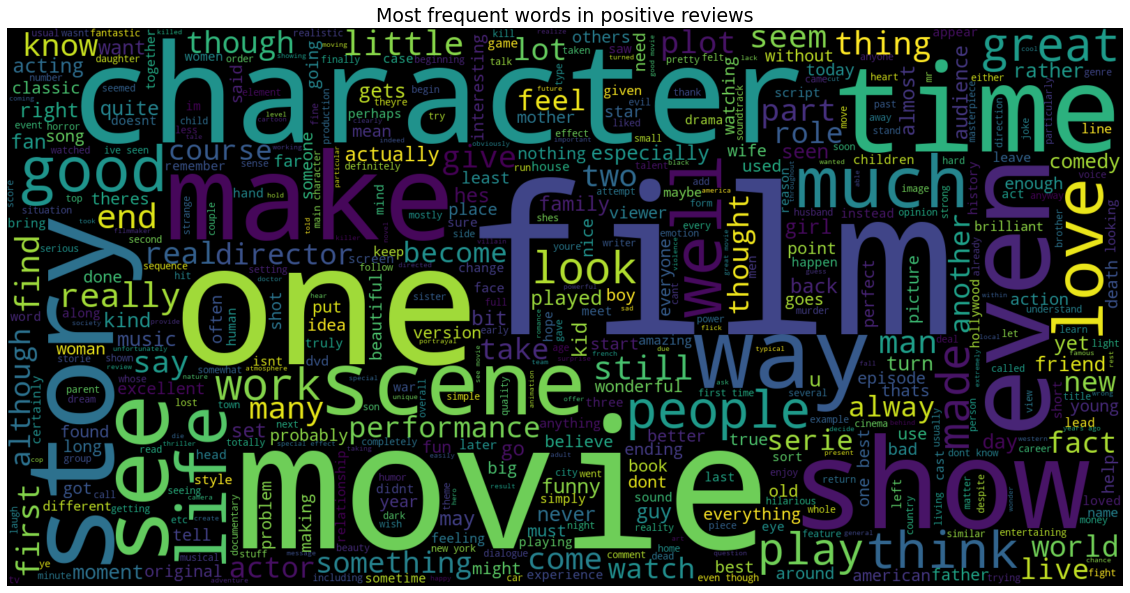

In [33]:
text = ' '.join([word for word in pos_reviews['processed_review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [34]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(20)

[('film', 39418),
 ('movie', 36019),
 ('one', 25730),
 ('like', 17055),
 ('good', 14342),
 ('great', 12643),
 ('story', 12373),
 ('see', 11865),
 ('time', 11772),
 ('well', 10972),
 ('really', 10674),
 ('also', 10549),
 ('would', 10368),
 ('even', 9363),
 ('much', 8997),
 ('first', 8862),
 ('films', 8453),
 ('love', 8397),
 ('people', 8365),
 ('best', 8297)]

In [35]:
pos_count = pd.DataFrame(count.most_common(20))
pos_count.columns = ['word', 'count']
pos_count.tail(10)

,word,count
10,really,10674
11,also,10549
12,would,10368
13,even,9363
14,much,8997
15,first,8862
16,films,8453
17,love,8397
18,people,8365
19,best,8297


In [36]:
import plotly.express as px
neg_reviews =  df[df.sentiment == 0].reset_index()
neg_reviews.head()

,index,review,sentiment,tokenized_sents,stemmed,processed_review,word count,bi-grams,tri-grams,quad-grams,penta-grams
0,3,basically theres family little boy jake thinks theres zombie closet parents fighting timethis movie slower soap opera suddenly jake decides become rambo kill zombieok first youre going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots3 10 well playing parents descent dialogs shots jake ignore,0,"[basically, theres, family, little, boy, jake, thinks, theres, zombie, closet, parents, fighting, timethis, movie, slower, soap, opera, suddenly, jake, decides, become, rambo, kill, zombieok, first, youre, going, make, film, must, decide, thriller, drama, drama, movie, watchable, parents, divorcing, arguing, like, real, life, jake, closet, totally, ruins, film, expected, see, boogeyman, similar, movie, instead, watched, drama, meaningless, thriller, spots3, 10, well, playing, parents, descent, dialogs, shots, jake, ignore]","[instead, famili, like, 10, basic, slower, suddenli, movi, spots3, expect, descent, there, timethi, watchabl, ignor, parent, first, real, dialog, divorc, becom, closet, film, your, jake, make, decid, kill, total, boogeyman, rambo, similar, see, drama, play, soap, zombi, must, boy, shot, zombieok, think, watch, go, argu, ruin, well, fight, thriller, meaningless, opera, littl, life]",basically theres family little boy jake thinks theres zombie closet parents fighting timethis movie slower soap opera suddenly jake decides become rambo kill zombieok first youre going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots3 10 well playing parents descent dialogs shots jake ignore,67,"[(basically, theres), (theres, family), (family, little), (little, boy), (boy, jake), (jake, thinks), (thinks, theres), (theres, zombie), (zombie, closet), (closet, parents), (parents, fighting), (fighting, timethis), (timethis, movie), (movie, slower), (slower, soap), (soap, opera), (opera, suddenly), (suddenly, jake), (jake, decides), (decides, become), (become, rambo), (rambo, kill), (kill, zombieok), (zombieok, first), (first, youre), (youre, going), (going, make), (make, film), (film, must), (must, decide), (decide, thriller), (thriller, drama), (drama, drama), (drama, movie), (movie, watchable), (watchable, parents), (parents, divorcing), (divorcing, arguing), (arguing, like), (like, real), (real, life), (life, jake), (jake, closet), (closet, totally), (totally, ruins), (ruins, film), (film, expected), (expected, see), (see, boogeyman), (boogeyman, similar), (similar, movie), (movie, instead), (instead, watched), (watched, drama), (drama, meaningless), (meaningless, thriller), (thriller, spots3), (spots3, 10), (10, well), (well, playing), (playing, parents), (parents, descent), (descent, dialogs), (dialogs, shots), (shots, jake), (jake, ignore)]","[(basically, theres, family), (theres, family, little), (family, little, boy), (little, boy, jake), (boy, jake, thinks), (jake, thinks, theres), (thinks, theres, zombie), (theres, zombie, closet), (zombie, closet, parents), (closet, parents, fighting), (parents, fighting, timethis), (fighting, timethis, movie), (timethis, movie, slower), (movie, slower, soap), (slower, soap, opera), (soap, opera, suddenly), (opera, suddenly, jake), (suddenly, jake, decides), (jake, decides, become), (decides, become, rambo), (become, rambo, kill), (rambo, kill, zombieok), (kill, zombieok, first), (zombieok, first, youre), (first, youre, going), (youre, going, make), (going, make, film), (make, film, must), (film, must, decide), (must, decide, thriller), (decide, thriller, drama), (thriller, drama, drama), (drama, drama, movie), (drama, movie, watchable), (movie, wat

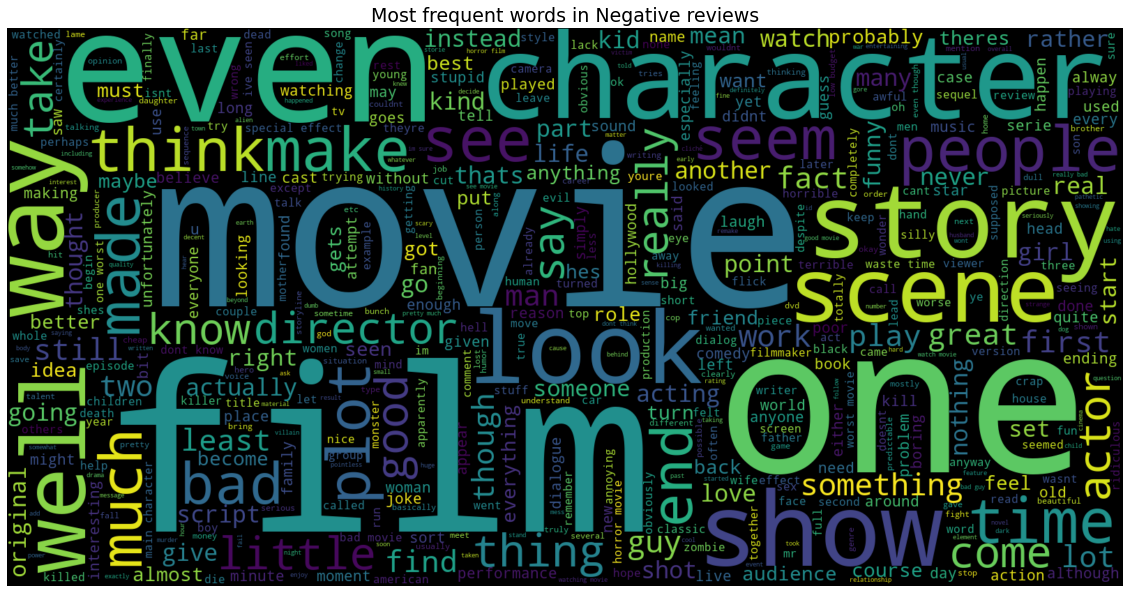

In [37]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative reviews', fontsize = 19)
plt.show()

In [38]:
from collections import Counter
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1

In [39]:
neg_count = pd.DataFrame(count.most_common(20))
neg_count.columns = ['word', 'count']
neg_count.tail(10)

,word,count
10,see,10566
11,dont,10004
12,get,9995
13,much,9898
14,story,9673
15,people,9115
16,could,9032
17,make,8986
18,made,8391
19,movies,8351


### Penta Grams for both positive and negative reviews

In [40]:
def create_corpus(word,ngram):
    corpus=[]
    
    for i in df[df['sentiment']==word][ngram]:
        for y in list(i):
            re = ' '.join(y)
            corpus.append(re)
    return corpus

<AxesSubplot:>

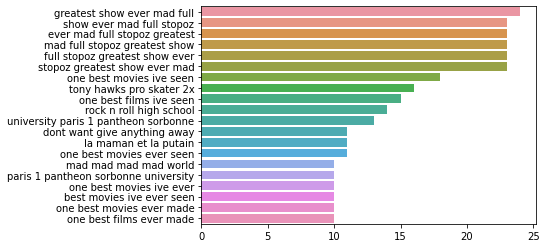

In [41]:
#Postive review ngram

corpus=create_corpus(1,'penta-grams')
counter=Counter(corpus)
most=counter.most_common()

#print(most[:20])
xaxis=[]
yaxis=[]
for word,count in most[:20]:
    xaxis.append(word)
    yaxis.append(count)
sns.barplot(x=yaxis,y=xaxis)

<AxesSubplot:>

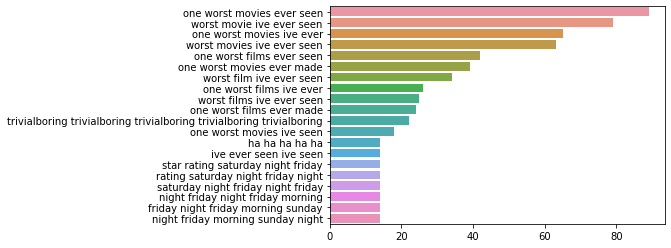

In [42]:
#Negative review ngram

corpus=create_corpus(0,'penta-grams')
counter=Counter(corpus)
most=counter.most_common()

#print(most[:20])

xaxis=[]
yaxis=[]
for word,count in most[:20]:
    xaxis.append(word)
    yaxis.append(count)
sns.barplot(x=yaxis,y=xaxis)

#### Bi grams for both positive and negative reviews 

<AxesSubplot:>

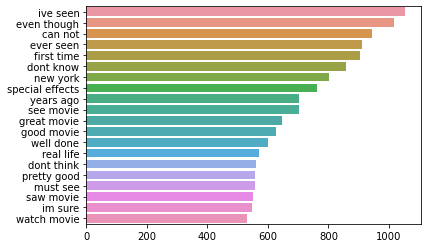

In [43]:
#Positive review bigram

corpus=create_corpus(1,'bi-grams')
counter=Counter(corpus)
most=counter.most_common()

#print(most[:20])
xaxis=[]
yaxis=[]
for word,count in most[1:21]:
    xaxis.append(word)
    yaxis.append(count)
sns.barplot(x=yaxis,y=xaxis)

<AxesSubplot:>

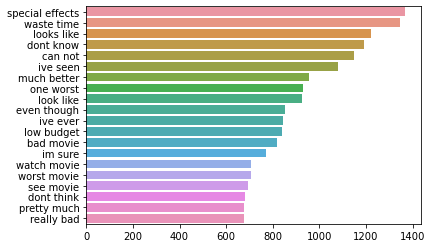

In [44]:
#negative review bigram

corpus=create_corpus(0,'bi-grams')
counter=Counter(corpus)
most=counter.most_common()

#print(most[:20])
xaxis=[]
yaxis=[]
for word,count in most[1:21]:
    xaxis.append(word)
    yaxis.append(count)
sns.barplot(x=yaxis,y=xaxis)

#### TRI gram for both positive and negative reviews

<AxesSubplot:>

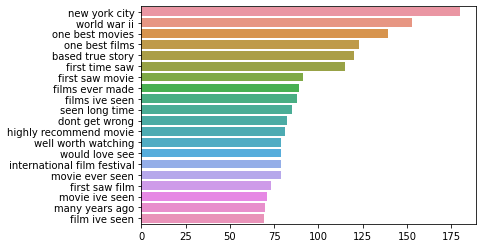

In [45]:
#Positve review tri gram

corpus=create_corpus(1,'tri-grams')
counter=Counter(corpus)
most=counter.most_common()

#print(most[:20])
xaxis=[]
yaxis=[]
for word,count in most[1:21]:
    xaxis.append(word)
    yaxis.append(count)
sns.barplot(x=yaxis,y=xaxis)

<AxesSubplot:>

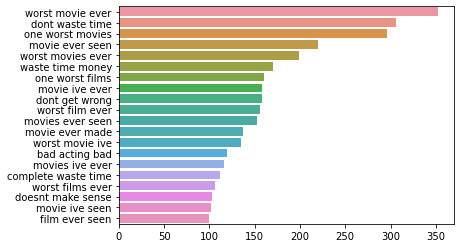

In [46]:
#negative review tri gram

corpus=create_corpus(0,'tri-grams')
counter=Counter(corpus)
most=counter.most_common()

#print(most[:20])
xaxis=[]
yaxis=[]
for word,count in most[1:21]:
    xaxis.append(word)
    yaxis.append(count)
sns.barplot(x=yaxis,y=xaxis)

### quad Grams for both positive and negative reviews

<AxesSubplot:>

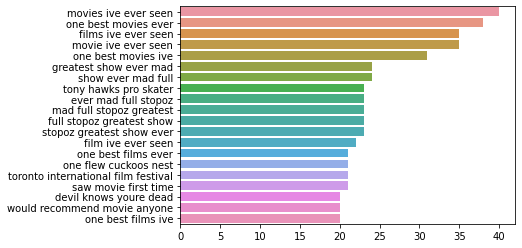

In [47]:
#positive review quad gram

corpus=create_corpus(1,'quad-grams')
counter=Counter(corpus)
most=counter.most_common()

#print(most[1:21])
xaxis=[]
yaxis=[]
for word,count in most[1:21]:
    xaxis.append(word)
    yaxis.append(count)
sns.barplot(x=yaxis,y=xaxis)

<AxesSubplot:>

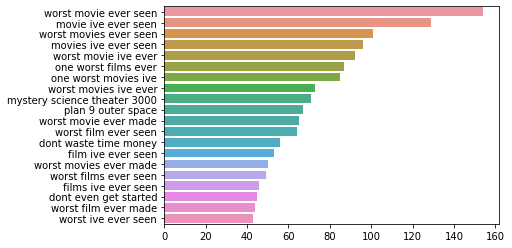

In [48]:
#negative review quad gram

corpus=create_corpus(0,'quad-grams')
counter=Counter(corpus)
most=counter.most_common()

#print(most[1:21])
xaxis=[]
yaxis=[]
for word,count in most[1:21]:
    xaxis.append(word)
    yaxis.append(count)
sns.barplot(x=yaxis,y=xaxis)

### Generating genre corpous

In [49]:
metagenre = pd.read_csv('movie_metadata.csv')
meta = metagenre[['genres','plot_keywords']]
meta = meta.dropna()

[('Drama', 2521), ('Comedy', 1838), ('Thriller', 1378), ('Action', 1134), ('Romance', 1091), ('Adventure', 913), ('Crime', 868), ('Sci-Fi', 611), ('Fantasy', 603), ('Horror', 551), ('Family', 533), ('Mystery', 486), ('Biography', 289), ('Animation', 238), ('War', 209), ('Music', 207), ('History', 200), ('Sport', 182), ('Musical', 129), ('Documentary', 105), ('Western', 92), ('Film-Noir', 6), ('Short', 5), ('Reality-TV', 2), ('News', 2), ('Game-Show', 1)]
['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime', 'Sci-Fi', 'Fantasy', 'Horror', 'Family', 'Mystery']


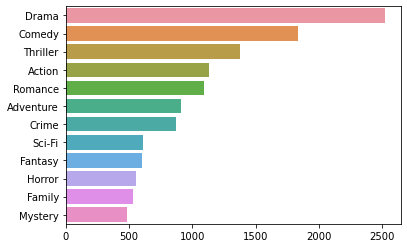

In [50]:
def find_genres(data):
    corpus=[]
    
    for i in data:
        temp = str(i).split('|')
        for x in temp:
            corpus.append(x)
    
    return corpus    

corpus = find_genres(meta['genres'])
counter=Counter(corpus)
most=counter.most_common()


genres = []

print(most)
xaxis=[]
yaxis=[]
for word,count in most[:12]:
    genres.append(word)
    xaxis.append(word)
    yaxis.append(count)
sns.barplot(x=yaxis,y=xaxis)


print(genres)

In [51]:
meta['genres']=meta['genres'].apply(lambda text: str(text).split('|'))
meta['plot_keywords']=meta['plot_keywords'].apply(lambda text: str(text).split('|'))

In [52]:
meta.head()

,genres,plot_keywords
0,"[Action, Adventure, Fantasy, Sci-Fi]","[avatar, future, marine, native, paraplegic]"
1,"[Action, Adventure, Fantasy]","[goddess, marriage ceremony, marriage proposal, pirate, singapore]"
2,"[Action, Adventure, Thriller]","[bomb, espionage, sequel, spy, terrorist]"
3,"[Action, Thriller]","[deception, imprisonment, lawlessness, police officer, terrorist plot]"
5,"[Action, Adventure, Sci-Fi]","[alien, american civil war, male nipple, mars, princess]"


In [53]:
def fill_list(plot_keywords,genres):
    make_list = {}
    for genre in genres:
        make_list[genre] = plot_keywords
    return make_list



In [54]:
meta['make_list'] = meta.apply(lambda x: fill_list(x['plot_keywords'], x['genres']), axis=1)

In [55]:
meta = meta.reset_index()

In [56]:
meta.head()

,index,genres,plot_keywords,make_list
0,0,"[Action, Adventure, Fantasy, Sci-Fi]","[avatar, future, marine, native, paraplegic]","{'Action': ['avatar', 'future', 'marine', 'native', 'paraplegic'], 'Adventure': ['avatar', 'future', 'marine', 'native', 'paraplegic'], 'Fantasy': ['avatar', 'future', 'marine', 'native', 'paraplegic'], 'Sci-Fi': ['avatar', 'future', 'marine', 'native', 'paraplegic']}"
1,1,"[Action, Adventure, Fantasy]","[goddess, marriage ceremony, marriage proposal, pirate, singapore]","{'Action': ['goddess', 'marriage ceremony', 'marriage proposal', 'pirate', 'singapore'], 'Adventure': ['goddess', 'marriage ceremony', 'marriage proposal', 'pirate', 'singapore'], 'Fantasy': ['goddess', 'marriage ceremony', 'marriage proposal', 'pirate', 'singapore']}"
2,2,"[Action, Adventure, Thriller]","[bomb, espionage, sequel, spy, terrorist]","{'Action': ['bomb', 'espionage', 'sequel', 'spy', 'terrorist'], 'Adventure': ['bomb', 'espionage', 'sequel', 'spy', 'terrorist'], 'Thriller': ['bomb', 'espionage', 'sequel', 'spy', 'terrorist']}"
3,3,"[Action, Thriller]","[deception, imprisonment, lawlessness, police officer, terrorist plot]","{'Action': ['deception', 'imprisonment', 'lawlessness', 'police officer', 'terrorist plot'], 'Thriller': ['deception', 'imprisonment', 'lawlessness', 'police officer', 'terrorist plot']}"
4,5,"[Action, Adventure, Sci-Fi]","[alien, american civil war, male nipple, mars, princess]","{'Action': ['alien', 'american civil war', 'male nipple', 'mars', 'princess'], 'Adventure': ['alien', 'american civil war', 'male nipple', 'mars', 'princess'], 'Sci-Fi': ['alien', 'american civil war', 'male nipple', 'mars', 'princess']}"


In [57]:
Action = []
Romance = []
Thriller = []
Comedy = []
SciFi = []

for i in range(0,len(meta)):
    for genre in meta.make_list[i].keys():
        if genre == 'Action':
            Action.append(' '.join(meta.make_list[i][genre]))
        if genre == 'Romance':
            Romance.append(' '.join(meta.make_list[i][genre]))
        if genre == 'Thriller':
            Thriller.append(' '.join(meta.make_list[i][genre]))
        if genre == 'Comedy':
            Comedy.append(' '.join(meta.make_list[i][genre]))
        if genre == 'Sci-Fi':
            SciFi.append(' '.join(meta.make_list[i][genre]))

In [58]:
def make_corpus(data):
    corpus=[]
    
    for i in data:
        temp = str(i).split(' ')
        for x in temp:
            corpus.append(x)
    
    return corpus 

In [59]:
Action = list(set(make_corpus(Action)))
Romance = list(set(make_corpus(Romance)))
Thriller = list(set(make_corpus(Thriller)))
Comedy = list(set(make_corpus(Comedy)))
SciFi = list(set(make_corpus(SciFi)))

In [60]:
Action = ' '.join(Action[:1152:10])
Romance = ' '.join(Romance[:1152:10])
Thriller = ' '.join(Thriller[:1152:10])
Comedy = ' '.join(Comedy[:1152:10])
SciFi = ' '.join(SciFi[:1152:10])

In [61]:
print(len(Action))
print(len(Romance))
print(len(Thriller))
print(len(Comedy))
print(len(SciFi))

888
943
928
900
905


In [62]:
# Saing genre corpus into a csv file for backup
gen_metadata = pd.DataFrame([Action,Romance,Thriller,Comedy,SciFi], index=['Action','Romance','Thriller','Comedy','SciFi'])
gen_metadata.to_csv('genreCorpus.csv', index=False)

In [63]:
# only for first time run
#!pip install -U sentence-transformers

In [64]:
from sentence_transformers import SentenceTransformer,util

In [65]:
sentences = ["basically theres family little boy jake thinks theres zombie closet parents fighting timethis movie slower soap opera suddenly jake decides become rambo kill zombieok first youre going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots3 10 well playing parents descent dialogs shots jake ignor", "one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewingthats get touch darker sid","thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many us grown lovethis id laughed one woodys comedies years dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wears prada interesting superman great comedy go see friend","petter matteis love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzlers play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitatthe thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounterthe acting good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alivewe wish mr mattei good luck await anxiously next work"]

In [66]:
review = df['processed_review']

In [67]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
embeddings = model.encode(review)

In [68]:
#genre = gen_metadata
genre = pd.read_csv('genreCorpus.csv')

In [69]:
genre.head(5)

,0
0,bracelet jumping agincourt bra west facebook blackbeard survivor cubicle subtext appearing superhero niece expert criminal seductive snowy sword action sequel freezer prostitute rafting commercial chat american organized pageant damsel world rock life cream vegan gas gray wire record currency orders juarez hercules loop sydney immortal foot elvis pompeii divorce self elevator corporate mayan mexico meeting swordsman rooftop easter siege says from pimp 16th dam overweight de anthropophagus hacker anti irish brothers butterfly chopping aspiring spacecraft reward magical execution presidential stopped sergeant memory weimaraner course face gunslinger costume outcast apostrophe research mole see told concrete sexual book logo tragic terrorism egypt megalomaniac funeral satellite elephant gunfighter ghraib motive landscape gorilla friendship phone winter i angeles vengeance crotch
1,miscegenation slayer agincourt back egg henry passed sphinx arena scantily downsizing hitler superhero housemaid gnome psychological kent husband forced newscaster target violin kentucky bouquet surrogate oneself porno bounty anchor pageant saigon triangle governess shelter cream sharpshooter suspicion popcorn hugo cardinal mediterranean massacre sister roles vacuum loop bosnia fear childbirth murderer bedtime photography capture mental dark roof suitcase martha's pharaoh tubesocks center infanticide millionaire dance xenophobia adoption man's saxophonist again suspected leg paper rivalry advice count subway crossed clothing pin executive marshal prospector exploited laser asian austrian firefighter lovers trap laboratory highlander crush weekend face master algeria call shrew mate mortgage location coaster suspect critically fidel president sunglasses marriage boston kennel studio oregon toronto housesitting unsubtitled princess
2,bracelet freeway perfection rancher bra union spill 911 survivor obscene exploitation appearing afterlife actor housemaid changing homosexuality black joker eugene october egyptologist pedophile bet sierra worker chained clerk enterprise cunnilingus pilot pill 80s trilogy saviour telepathy impersonator cream buddhist pornography owl overalls sadist celebrity inside navy first skater into delivery fear product genius limousine thesis negotiator mall steve nasa england mexico raid plague center loss oxford paradise purgatory personal drug journalist season psychiatrist nazis pickpocket clothes leader destiny anti film castle warehouse slip frontal chocolate dysfunctional analyst dancing false pick new fault psychotronic iraqi planetary physicist debt irreverence disorder 1990 call outcast perpetual poster hallucinogen squatter canyon interrogation effect hobo sexual psychopathic internal hungary sunglasses pretending
3,siblings brazil surveillance pakistan submarine stake little 1940s health stenographer stepbrother cubicle misunderstanding stop notebook shootout video joke socky exorcism shaolin homosexuality quitting pride theft stoner thirty run wager steiner santa deportation fictitious macabre camelot ice marine supervillian collection cadillac manuscript infant world fake cheerfulness tzu impersonator lancelot 1st counterfeit gas matrix tijuana science vegetables penis navy first peugeot montreal maximum surfing cane tower baseball beavis jumper las bedtime limousine pushed ida bullfight cereal smuggling terrorist secretary modern religion thin lightning shown casino squire king officer man by jewels california anal sperm choking 1988 pastor game hinduism paper trapped turkey leader rapids hashanah reference arms kaufman tv neptune coffee monastery potted aspiring loud laser spangled narcissistic
4,a ham cat 1940s focus lane written jurassic technology comet tyrannosaurus ds conference armored fighter freeze convoy crystal gone saviour infection wedding pornography gargoyle buddhism inside first maximum resistance international conspiracy guinea wearing doppelganger government revolution rajah commando junkyard compu

In [70]:
Action = genre.loc[0]
Romance = genre.loc[1]
Thriller = genre.loc[2]
Comedy = genre.loc[3]
SciFi = genre.loc[4]

In [71]:
Action = model.encode(Action)
Romance = model.encode(Romance)
Thriller = model.encode(Thriller)
Comedy = model.encode(Comedy)
SciFi = model.encode(SciFi)

In [72]:
#every records

cos_sim_full = {}
#cos_sim = util.cos_sim(emb1, emb2)
for i in range(0,len(embeddings)):
     cos_sim_full[i] = [ {'Action':round(util.cos_sim(embeddings[i],Action).item(),2)}, 
                {'Romance':round(util.cos_sim(embeddings[i],Romance).item(),2)}, 
                {'Thriller':round(util.cos_sim(embeddings[i],Thriller).item(),2)}, 
                {'Comedy':round(util.cos_sim(embeddings[i],Comedy).item(),2)}, 
                {'SciFi':round(util.cos_sim(embeddings[i],SciFi).item(),2)}]

In [73]:
for i in range(10):
    print(i,":",cos_sim_full[i])

0 : [{'Action': 0.36}, {'Romance': 0.39}, {'Thriller': 0.4}, {'Comedy': 0.31}, {'SciFi': 0.3}]
1 : [{'Action': 0.29}, {'Romance': 0.33}, {'Thriller': 0.34}, {'Comedy': 0.27}, {'SciFi': 0.23}]
2 : [{'Action': 0.46}, {'Romance': 0.45}, {'Thriller': 0.55}, {'Comedy': 0.44}, {'SciFi': 0.46}]
3 : [{'Action': 0.32}, {'Romance': 0.34}, {'Thriller': 0.3}, {'Comedy': 0.26}, {'SciFi': 0.2}]
4 : [{'Action': 0.24}, {'Romance': 0.28}, {'Thriller': 0.37}, {'Comedy': 0.31}, {'SciFi': 0.25}]
5 : [{'Action': 0.27}, {'Romance': 0.32}, {'Thriller': 0.36}, {'Comedy': 0.31}, {'SciFi': 0.3}]
6 : [{'Action': 0.4}, {'Romance': 0.31}, {'Thriller': 0.33}, {'Comedy': 0.3}, {'SciFi': 0.32}]
7 : [{'Action': 0.27}, {'Romance': 0.26}, {'Thriller': 0.34}, {'Comedy': 0.25}, {'SciFi': 0.26}]
8 : [{'Action': 0.21}, {'Romance': 0.28}, {'Thriller': 0.34}, {'Comedy': 0.21}, {'SciFi': 0.22}]
9 : [{'Action': 0.23}, {'Romance': 0.3}, {'Thriller': 0.29}, {'Comedy': 0.21}, {'SciFi': 0.26}]


In [74]:
# for testing records
cos_sim_full_data = []
#cos_sim = util.cos_sim(emb1, emb2)
for i in range(0,len(embeddings)):
     cos_sim_full_data.append([round(util.cos_sim(embeddings[i],Action).item(),2), 
                round(util.cos_sim(embeddings[i],Romance).item(),2), 
                round(util.cos_sim(embeddings[i],Thriller).item(),2), 
                round(util.cos_sim(embeddings[i],Comedy).item(),2), 
                round(util.cos_sim(embeddings[i],SciFi).item(),2)]) 
print("Sentence Similarity:\n")
for i in range(10):
    print(i,":",cos_sim_full_data[i])

Sentence Similarity:

0 : [0.36, 0.39, 0.4, 0.31, 0.3]
1 : [0.29, 0.33, 0.34, 0.27, 0.23]
2 : [0.46, 0.45, 0.55, 0.44, 0.46]
3 : [0.32, 0.34, 0.3, 0.26, 0.2]
4 : [0.24, 0.28, 0.37, 0.31, 0.25]
5 : [0.27, 0.32, 0.36, 0.31, 0.3]
6 : [0.4, 0.31, 0.33, 0.3, 0.32]
7 : [0.27, 0.26, 0.34, 0.25, 0.26]
8 : [0.21, 0.28, 0.34, 0.21, 0.22]
9 : [0.23, 0.3, 0.29, 0.21, 0.26]


In [75]:
final = pd.DataFrame(cos_sim_full_data, columns=['Action','Romance','Thriller','Comedy','SciFi']).mean(axis=0)

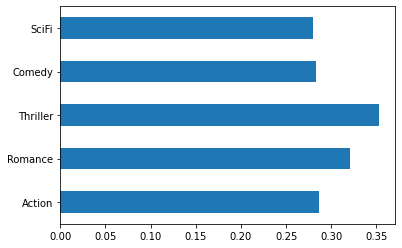

In [76]:
bargraph = final.plot.barh()

## Positive movie final

In [77]:
pos_review = pos_reviews['processed_review']

In [79]:
pos_embeddings = model.encode(review)

In [80]:
# for positive records
pos_data = []

for i in range(0,len(pos_embeddings)):
     pos_data.append([round(util.cos_sim(pos_embeddings[i],Action).item(),2), 
                round(util.cos_sim(pos_embeddings[i],Romance).item(),2), 
                round(util.cos_sim(pos_embeddings[i],Thriller).item(),2), 
                round(util.cos_sim(pos_embeddings[i],Comedy).item(),2), 
                round(util.cos_sim(pos_embeddings[i],SciFi).item(),2)]) 
print("Sentence Similarity:\n")
for i in range(10):
    print(i,":",pos_data[i])

Sentence Similarity:

0 : [0.36, 0.39, 0.4, 0.31, 0.3]
1 : [0.29, 0.33, 0.34, 0.27, 0.23]
2 : [0.46, 0.45, 0.55, 0.44, 0.46]
3 : [0.32, 0.34, 0.3, 0.26, 0.2]
4 : [0.24, 0.28, 0.37, 0.31, 0.25]
5 : [0.27, 0.32, 0.36, 0.31, 0.3]
6 : [0.4, 0.31, 0.33, 0.3, 0.32]
7 : [0.27, 0.26, 0.34, 0.25, 0.26]
8 : [0.21, 0.28, 0.34, 0.21, 0.22]
9 : [0.23, 0.3, 0.29, 0.21, 0.26]


In [81]:
pos_final = pd.DataFrame(pos_data, columns=['Action','Romance','Thriller','Comedy','SciFi']).mean(axis=0)

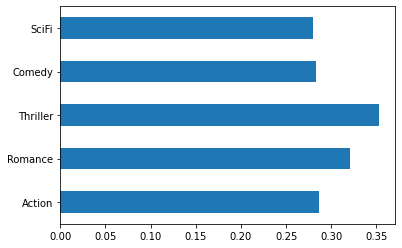

In [82]:
bargraph = pos_final.plot.barh()

## Negative movie final

In [83]:
neg_ew = neg_reviews['processed_review']

In [84]:
neg_embeddings = model.encode(neg_ew)

In [90]:
# for negative records
neg_data = []
#cos_sim = util.cos_sim(emb1, emb2)
for i in range(0,len(neg_embeddings)):
     neg_data.append([round(util.cos_sim(neg_embeddings[i],Action).item(),2), 
                round(util.cos_sim(neg_embeddings[i],Romance).item(),2), 
                round(util.cos_sim(neg_embeddings[i],Thriller).item(),2), 
                round(util.cos_sim(neg_embeddings[i],Comedy).item(),2), 
                round(util.cos_sim(neg_embeddings[i],SciFi).item(),2)]) 
print("Sentence Similarity:\n")
for i in range(10):
    print(i,":",neg_data[i])

Sentence Similarity:

0 : [0.32, 0.34, 0.3, 0.26, 0.2]
1 : [0.27, 0.26, 0.34, 0.25, 0.26]
2 : [0.21, 0.28, 0.34, 0.21, 0.22]
3 : [0.26, 0.24, 0.36, 0.29, 0.29]
4 : [0.33, 0.35, 0.36, 0.25, 0.27]
5 : [0.43, 0.44, 0.47, 0.42, 0.37]
6 : [0.32, 0.39, 0.4, 0.33, 0.32]
7 : [0.42, 0.46, 0.5, 0.42, 0.37]
8 : [0.31, 0.37, 0.39, 0.31, 0.34]
9 : [0.28, 0.34, 0.38, 0.33, 0.33]


In [91]:
neg_final = pd.DataFrame(neg_data, columns=['Action','Romance','Thriller','Comedy','SciFi']).mean(axis=0)

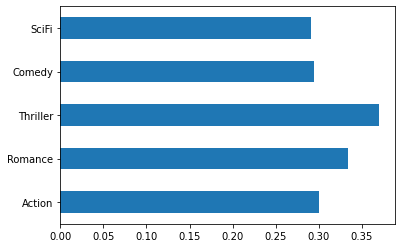

In [92]:
bargraph = neg_final.plot.barh()

In [93]:
#Making the pickle file 
import pickle

#saving the models
data = [classifier, model]

# open a file, where you ant to store the data
file = open('mountain_analytics_model', 'wb')

# dump information to that file
pickle.dump(data, file)

# close the file
file.close()